 # Problem Statement

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Steps
- Import relevant libraries/modules
- **Basic EDA**
    - Imbalance Data
    - Missing data
    - Duplicate data
    - Outliers and Anomalies
    - Data Visualization
    - Feature Encoding
    - Feature Selection
- **Model Building**
    - Separate data into dependent and independent
    - Split into train and test set
    - Model Selection
    - Model Training
    - Model Prediction
    - Model Evaluation


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Basic EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.shape

(3276, 10)

In [10]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Imbalance Data

In [15]:
df['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [23]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [25]:
print(round(len(df[df['Potability'] == 0])/len(df),2))
print(round(len(df[df['Potability'] == 1])/len(df),2))
# Balanced dataset

0.61
0.39


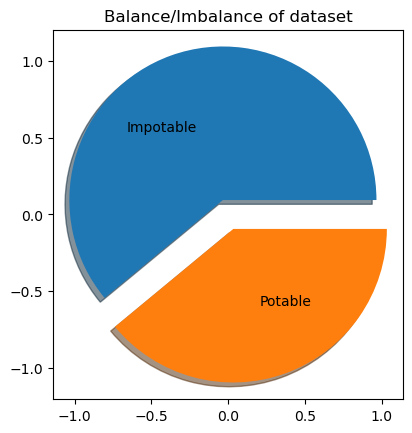

In [27]:
x = [round(len(df[df['Potability'] == 0])/len(df),2),round(len(df[df['Potability'] == 1])/len(df),2)]
plt.pie(x , labels=['Impotable' , 'Potable'] , shadow=True ,labeldistance=0.5 , frame = True ,explode = [0.1,0.1])
plt.title('Balance/Imbalance of dataset')
plt.show()

# Missing Value

In [30]:
df.isna().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [32]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)

ph
Sulfate
Trihalomethanes


In [34]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(f'{i}---> {df[i].mean()}')

ph---> 7.080794504276835
Sulfate---> 333.7757766108135
Trihalomethanes---> 66.39629294676803


ph
Mean --> 7.080794504276835
Median --> 7.036752103833548


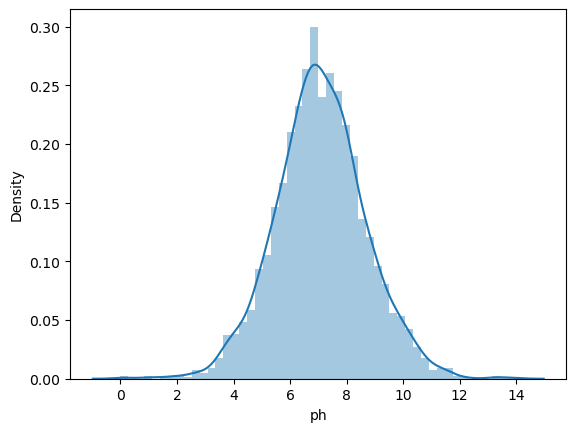

Sulfate
Mean --> 333.7757766108135
Median --> 333.073545745888


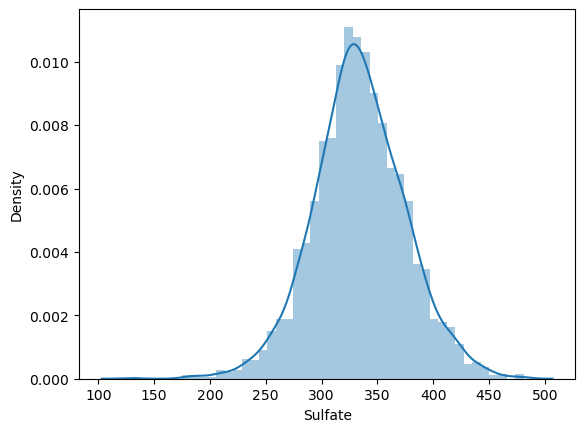

Trihalomethanes
Mean --> 66.39629294676803
Median --> 66.62248509808484


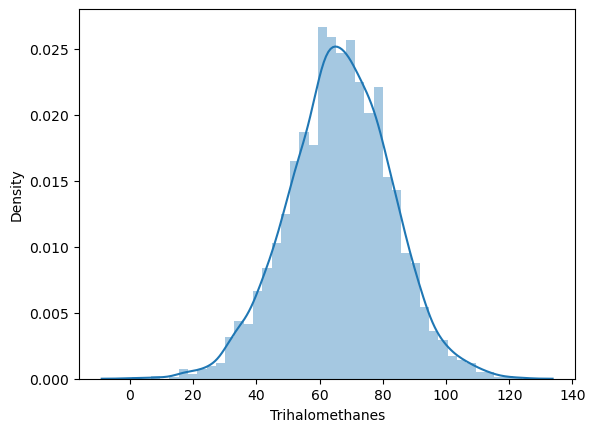

In [36]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print(f'Mean --> {df[i].mean()}')
        print(f'Median --> {df[i].median()}')
        
        sb.distplot(df[i])
        plt.show()

In [69]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mean(),inplace = True)
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Duplicate Data

In [72]:
df.duplicated().sum()

0

In [74]:
df[df.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


# Outliers & Anomalies

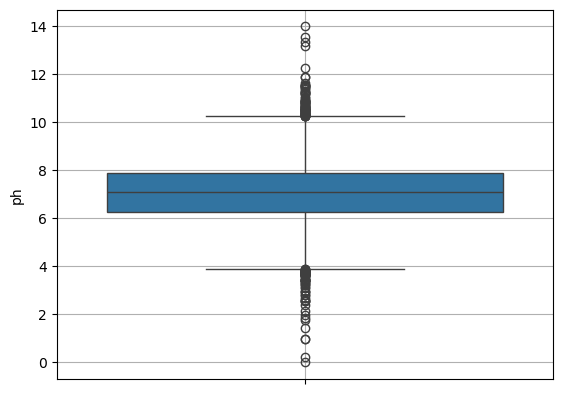

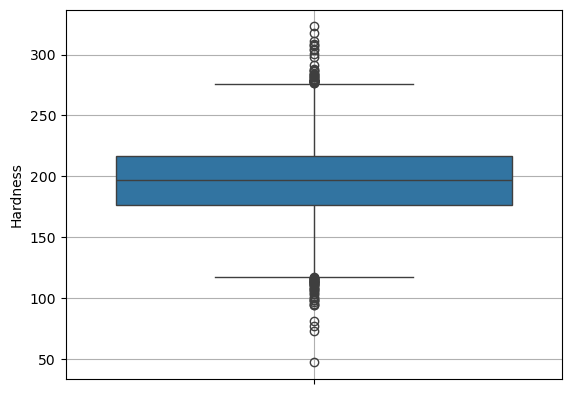

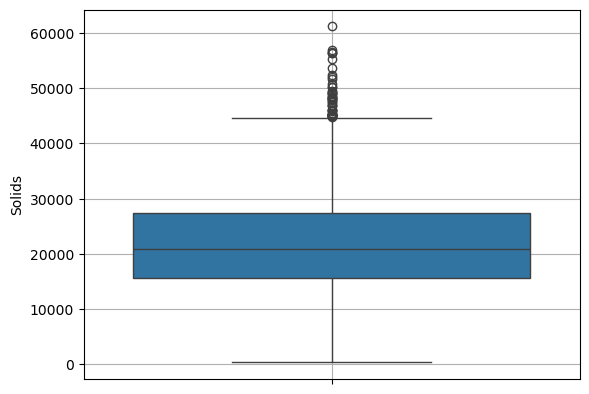

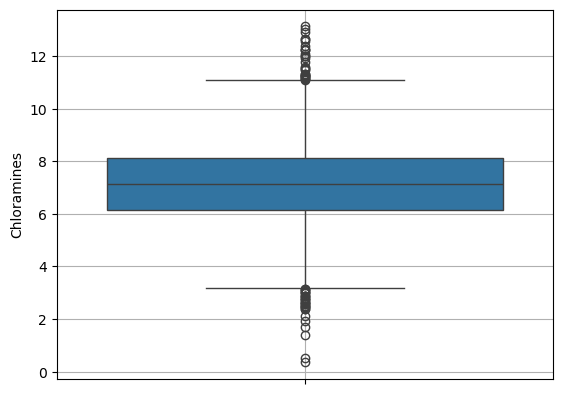

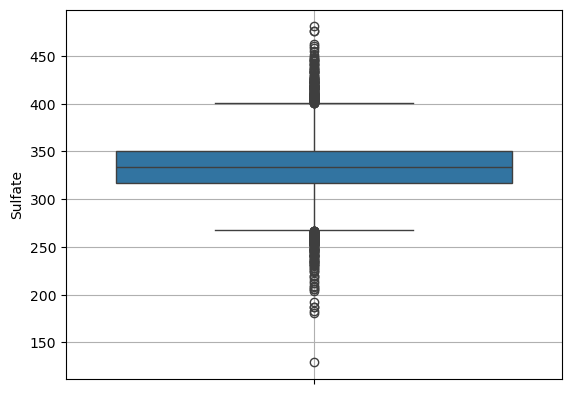

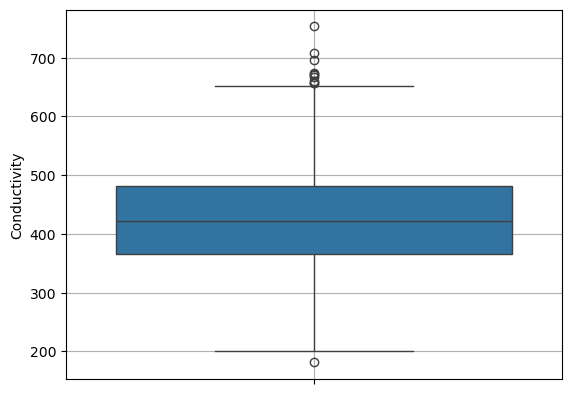

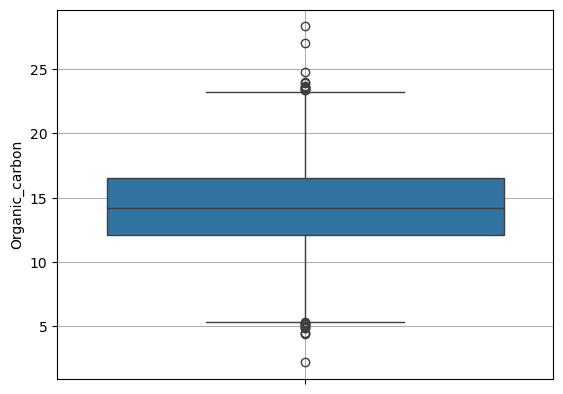

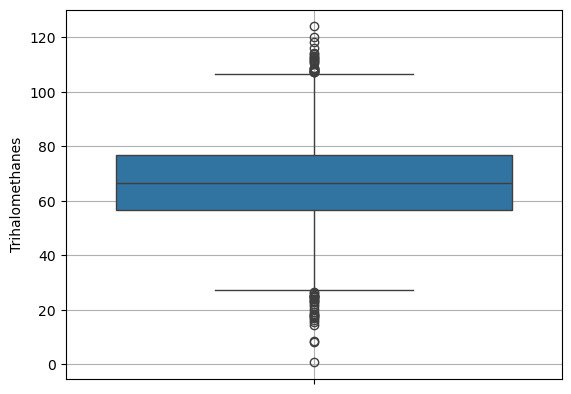

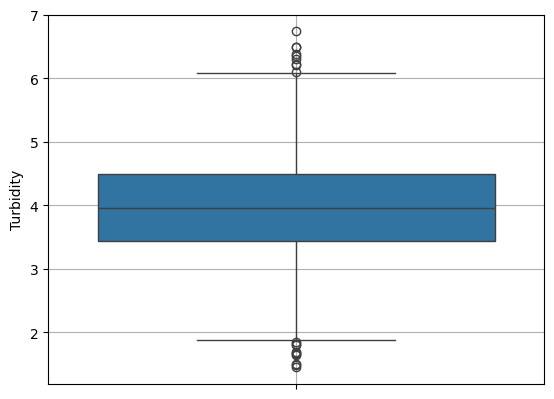

In [77]:
for i in df.columns:
    if i == 'Potability':
        pass
    else:
        sb.boxplot(df[i])
        plt.grid()
        plt.show()

In [78]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

print(f'IQR:\n{IQR}')

IQR:
ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [79]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'lower_bound:\n{lower_bound}')
print()
print(f'upper_bound:\n{upper_bound}')

lower_bound:
ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64

upper_bound:
ph                    10.258615
Hardness             276.392834
Solids             44831.869873
Chloramines           11.096086
Sulfate              400.322434
Conductivity         655.879140
Organic_carbon        23.295427
Trihalomethanes      106.695040
Turbidity              6.091233
Potability             2.500000
dtype: float64


In [80]:
data = df[~((df < lower_bound) | (df > upper_bound)).any(axis = 1)]
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [81]:
data.shape

(2666, 10)

In [82]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Feature Selection

In [90]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.131362,-0.087036,-0.062888,0.016894,0.001943,0.026160,0.009172,-0.043034,-0.005949
Hardness,0.131362,1.000000,-0.045552,-0.035832,-0.027939,-0.030415,0.012463,-0.007093,-0.022362,-0.000710
Solids,-0.087036,-0.045552,1.000000,-0.040392,-0.110090,0.007087,0.026793,-0.024550,0.022801,0.005600
Chloramines,-0.062888,-0.035832,-0.040392,1.000000,0.024502,-0.015277,-0.000684,0.016574,-0.005415,0.013195
Sulfate,0.016894,-0.027939,-0.110090,0.024502,1.000000,-0.005850,-0.007588,-0.022269,-0.017310,-0.003741
Conductivity,0.001943,-0.030415,0.007087,-0.015277,-0.005850,1.000000,0.006515,-0.001138,0.007674,-0.001886
Organic_carbon,0.026160,0.012463,0.026793,-0.000684,-0.007588,0.006515,1.000000,-0.000059,-0.016705,-0.027090
Trihalomethanes,0.009172,-0.007093,-0.024550,0.016574,-0.022269,-0.001138,-0.000059,1.000000,-0.024269,0.014351
Turbidity,-0.043034,-0.022362,0.022801,-0.005415,-0.017310,0.007674,-0.016705,-0.024269,1.000000,0.004761
Potability,-0.005949,-0.000710,0.005600,0.013195,-0.003741,-0.001886,-0.027090,0.014351,0.004761,1.000000


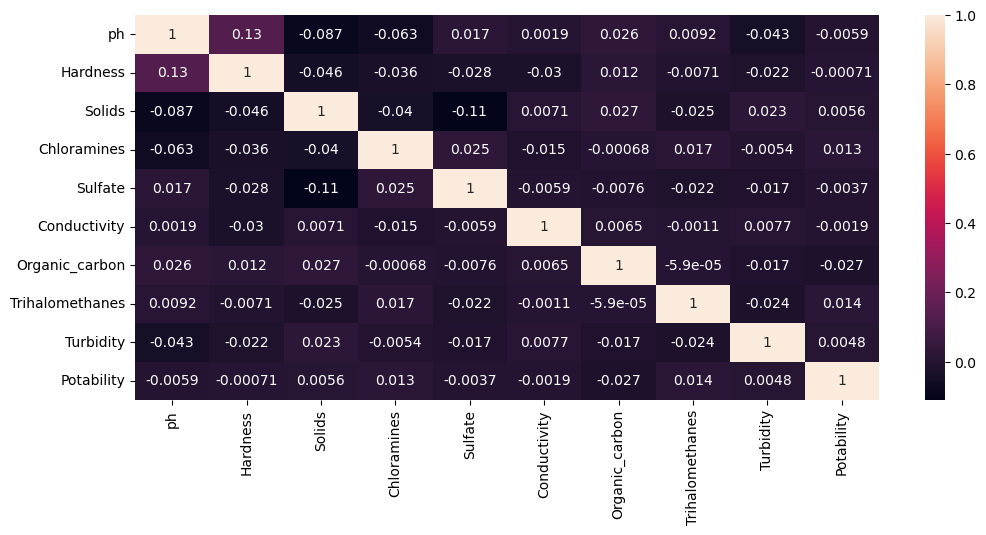

In [106]:
plt.figure(figsize = (12,5))
sb.heatmap(data.corr() , annot = True)
plt.show()

In [108]:
df.corr()['Potability']

ph                -0.003287
Hardness          -0.013837
Solids             0.033743
Chloramines        0.023779
Sulfate           -0.020619
Conductivity      -0.008128
Organic_carbon    -0.030001
Trihalomethanes    0.006960
Turbidity          0.001581
Potability         1.000000
Name: Potability, dtype: float64

# Model Building

# Separate into dependent and independent

In [112]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [122]:
X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

In [118]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [124]:
y 

0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2666, dtype: int64

# Split into train and test data

In [127]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train.shape,y_train.shape

((2132, 9), (2132,))

In [131]:
X_test.shape,y_test.shape

((534, 9), (534,))

# Feature Scaling

In [146]:
from sklearn.preprocessing import StandardScaler

In [150]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [152]:
X_train_sc

array([[ 1.08790956,  2.09056478, -0.59647931, ..., -1.05584236,
        -0.76370666, -0.13696497],
       [-1.74032936, -1.54115475, -0.18021947, ..., -0.74586468,
         0.12902908, -0.11598472],
       [ 0.0119423 , -1.41562152,  0.19157245, ...,  1.52916801,
         1.0208548 ,  2.11818687],
       ...,
       [ 0.35677911,  0.49545104,  0.26969765, ...,  1.1716937 ,
        -0.91406427,  0.65386741],
       [ 0.55136958,  0.99173017, -0.2579827 , ...,  0.27335131,
         0.56043327, -0.33985365],
       [ 0.0119423 ,  2.10605667, -1.585393  , ...,  0.79325653,
         0.41990686, -0.77401858]])

In [156]:
X_test_sc

array([[ 0.76955275,  0.0591837 ,  2.49249786, ..., -0.07283378,
         0.16249225, -0.52065935],
       [-1.37679259, -0.49759241, -0.77389725, ...,  1.02418171,
        -1.04356868, -1.15747579],
       [-0.50185216, -0.87086   , -0.85715381, ..., -1.40586274,
        -0.60781891,  0.9004857 ],
       ...,
       [-1.46694886,  0.23524254,  0.15325569, ..., -0.16535897,
         1.1010898 , -1.35989889],
       [ 0.35343507, -0.42462971,  0.42181357, ...,  0.19609378,
         0.55484498, -0.21437106],
       [ 0.26376863,  0.44151539,  1.28298512, ...,  0.76844349,
        -1.60818106, -0.33879065]])

# Model Selection

In [158]:
lr = LogisticRegression()
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [162]:
lr.score(X_train_sc,y_train)

0.623358348968105

In [164]:
lr.score(X_test_sc,y_test)

0.6404494382022472

In [216]:
dt = DecisionTreeClassifier(max_depth = 9)
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier(max_depth=9)

In [218]:
dt.score(X_train_sc,y_train)

0.7889305816135085

In [220]:
dt.score(X_test_sc,y_test)

0.6198501872659176

In [210]:
rf = RandomForestClassifier(max_depth = 9)
rf.fit(X_train_sc,y_train)

RandomForestClassifier(max_depth=9)

In [212]:
rf.score(X_train_sc,y_train)

0.8090994371482176

In [214]:
rf.score(X_test_sc,y_test)

0.6722846441947565

In [222]:
gb = GradientBoostingClassifier()
gb.fit(X_train_sc,y_train)

GradientBoostingClassifier()

In [224]:
gb.score(X_train_sc,y_train)

0.7514071294559099

In [226]:
gb.score(X_test_sc,y_test)

0.6404494382022472

# Model Training

In [229]:
rf = RandomForestClassifier(max_depth = 9)
rf.fit(X_train_sc,y_train)

RandomForestClassifier(max_depth=9)

In [233]:
y_pred_train = rf.predict(X_train_sc)
y_pred_test = rf.predict(X_test_sc)

In [235]:
y_train[:3]

2271    0
2748    1
3106    0
Name: Potability, dtype: int64

In [237]:
y_pred_train[:3]

array([0, 1, 0], dtype=int64)

# Model Evaluation

In [242]:
accuracy_score(y_train,y_pred_train)

0.8161350844277674

In [244]:
accuracy_score(y_test,y_pred_test)

0.653558052434457

In [246]:
confusion_matrix(y_train,y_pred_train)

array([[1328,    1],
       [ 391,  412]], dtype=int64)

In [248]:
confusion_matrix(y_test,y_pred_test)

array([[324,  18],
       [167,  25]], dtype=int64)

In [252]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1329
           1       1.00      0.51      0.68       803

    accuracy                           0.82      2132
   macro avg       0.89      0.76      0.77      2132
weighted avg       0.86      0.82      0.80      2132

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       342
           1       0.58      0.13      0.21       192

    accuracy                           0.65       534
   macro avg       0.62      0.54      0.50       534
weighted avg       0.63      0.65      0.57       534



<Axes: >

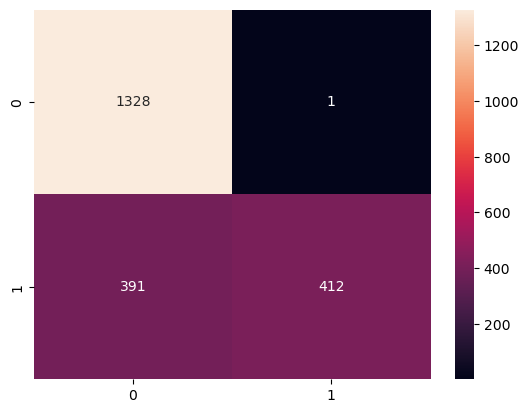

In [274]:
sb.heatmap(confusion_matrix(y_train,y_pred_train),annot = True ,fmt = '.4g' )


<Axes: >

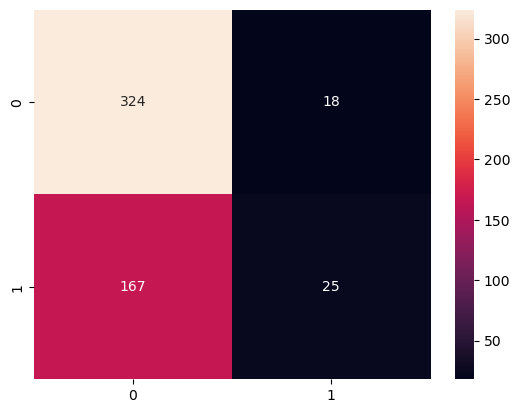

In [276]:
sb.heatmap(confusion_matrix(y_test,y_pred_test),annot = True ,fmt = '.4g' )